# **Analisis Data Menggunakan Tools KNIME**

KNIME merupakan sebuah tools analisis data yang sering digunakan oleh Data Analyst. Dengan KNIME, para pengguna dapat dengan mudah mengolah data, membuat model prediksi, serta visualisasi hasil analisis data. Dengan menggunakan KNIME, kita dapat belajar mengenai komsep dasar dalam data science secara praktis.KNIME juga memberikan fleksibilitas bagi penggunanya untuk menggabungkan beberapa algoritma analisis data sehingga memudahkan dalam pembuatan workflow analisis yang kompleks.

## **Proses Analisis data E-Coli Menggunakan Tools KNIME**

Beberapa tools yang harus dipersiapkan dalam analisis menggunakan KNIME yakni:

1.   KNIME

      *   Tools KNIME dapat diunduh melalui sites https://www.knime.com/downloads

      *   Pilih versi sesuai sistem operasi (Windows / Mac / Linux).

2.   JDK PostgreSQL

      *   Kunjungi sites https://jdbc.postgresql.org/download/ dan pilih versi JDK yang terbaru.

      *   Install JDK Postgre yang nantinya digunakan untuk mengkoneksikan database Postgre yang dieksekusi di tools KNIME.

3.   Miniconda

      *   Kunjungi sites https://www.anaconda.com/docs/getting-started/miniconda/main

      *   Kemudian Install setup dan ikuti seluruh instruksi installasi yang sudah diatur oleh pihak Miniconda.



## **Membuat Environment baru pada Miniconda**

Environment yang dibuat akan digunakan untuk sebagai lingkungan untuk menjalankan script Python pada tools KNIME.

### Langkah-Langkah Membuat Environment Baru pada Miniconda

1. Buka command prompt, digunakan untuk menginstall.

2.   Buat Environment dengan cara memasukkan perintah `conda create --name tugaspsd -c knime -c conda-forge knime-python-scripting python=3.9`

      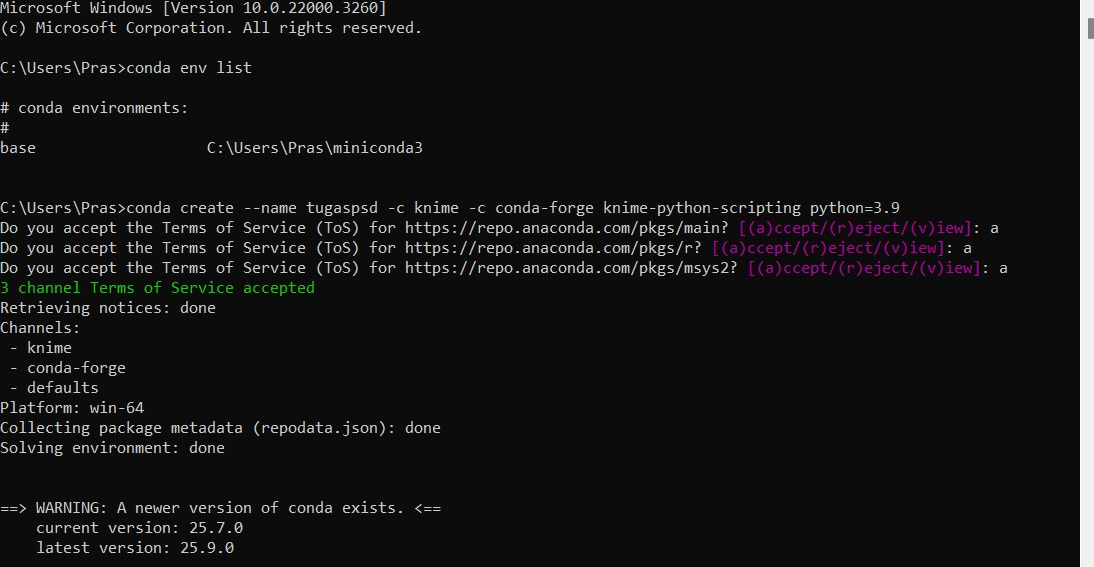

3.   Apabila telah berhasil membuat Environment baru maka aktifkan dengan cara memasukkan perintah `conda activate nama_env`

      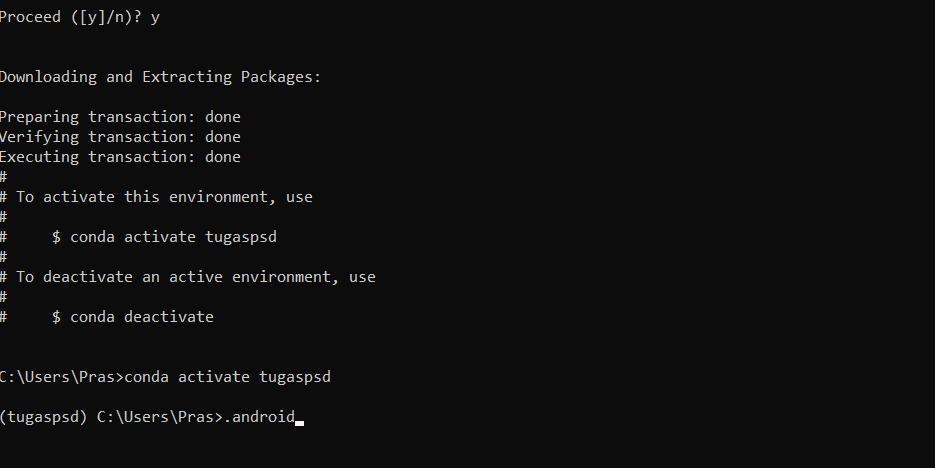

4.   Tunggu hingga proses installasi selesai.

### Memulai Membuat Project dan Analisis Data Pada Tools KNIME

Langkah-langkah membuat project baru:

1.   Buka Tools KNIME yang telah terinstall. Pada halaman utama, pilih “Local Space” untuk membuat project baru.

2.   Kemudian klik tombol tambah untuk membuat project dan memberi nama pada projectnya.

      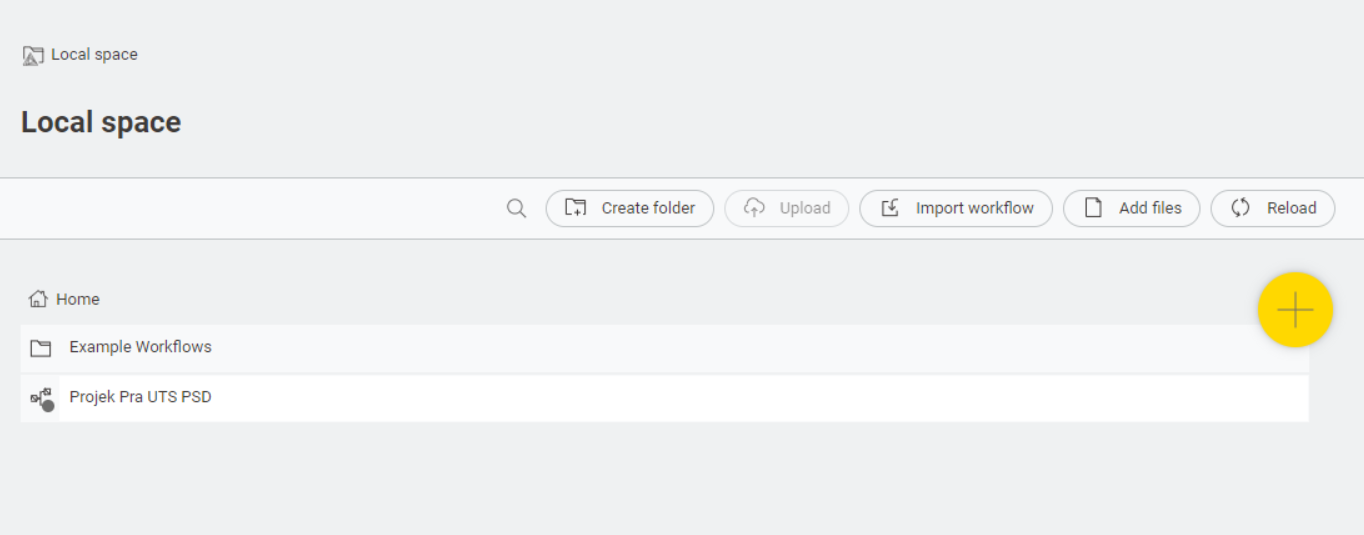

3.   Setelah memasukkan nama project, klik tombol “create” untuk membuat project.

### Mengimplementasikan Knime

1.   Pilih Node PostgreSQL Connector, karena kita menggunakan database Postgre. Kemudian drag menuju kolom workflow:

      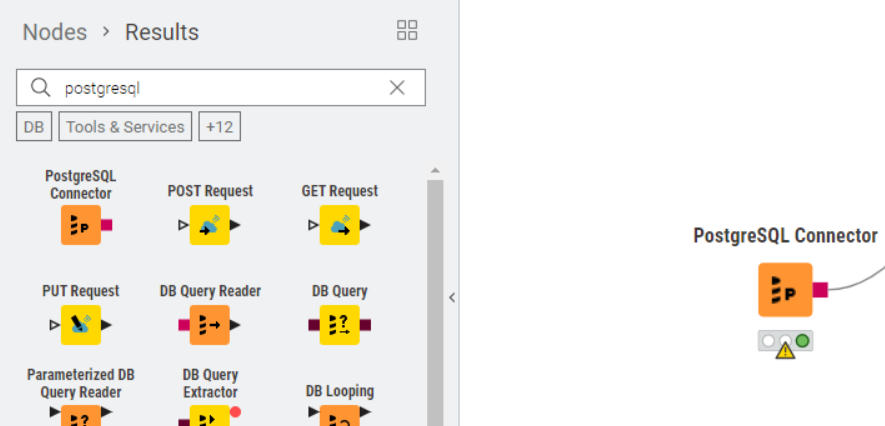

2.   Kemudian klik dua kali node PostgreSQL dan masukkan yang perlu di isi, agar dapat tersambung dengan database PostgreSQL.

      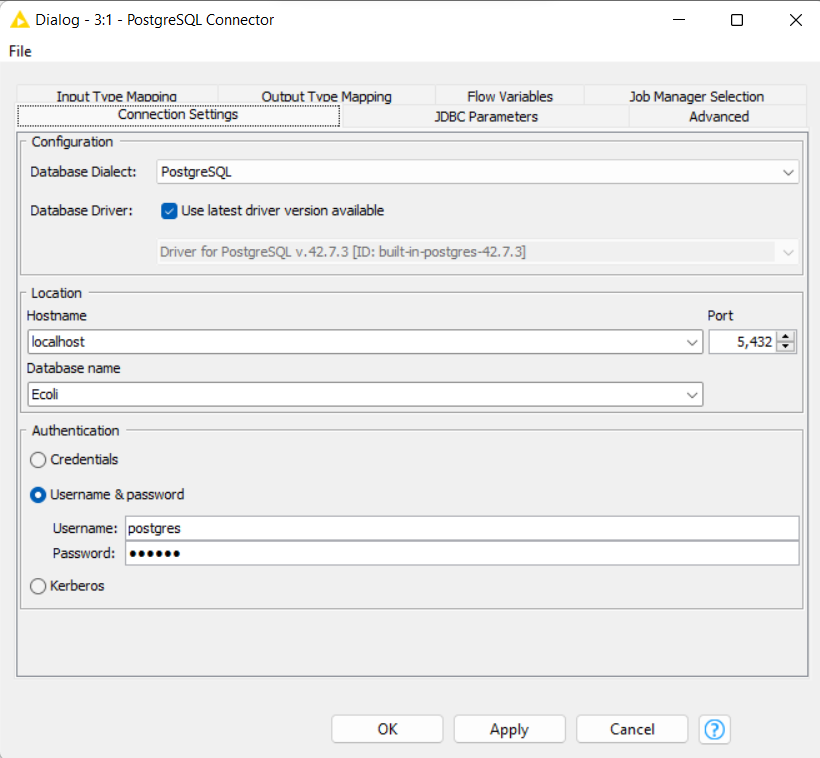

3.   Kemudian klik Apply untuk menyimpan kredensial dari koneksi database nya.

4.   Tambakan node "DB Reader" untuk membaca atau mengquery data yang sudah di query:

      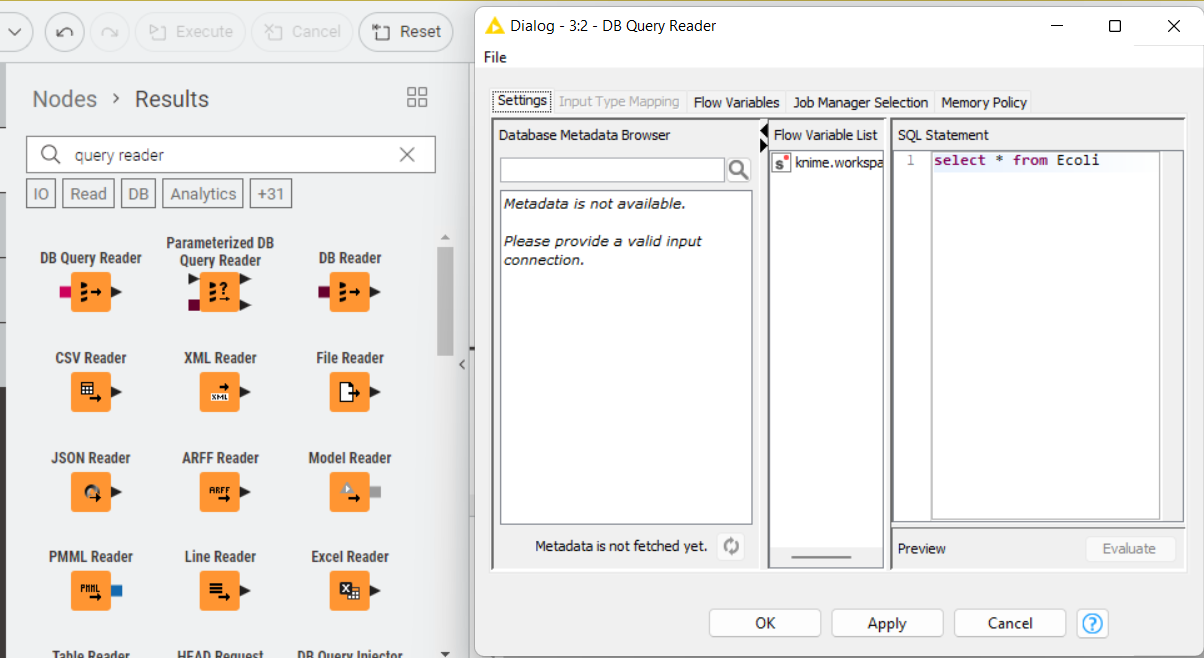

5.  Column Filter

      Langkah Column Filter digunakan untuk memilih kolom-kolom yang relevan dari dataset sebelum dilakukan tahap analisis lebih lanjut. Pada tahap ini, node Column Filter berfungsi untuk menyaring atribut yang akan digunakan dan menghapus kolom yang tidak diperlukan agar data yang masuk ke proses berikutnya lebih bersih dan sesuai kebutuhan. Kolom-kolom yang dipilih meliputi atribut seperti id, mcg, gvh, lip, chg, aac, alm1, alm2, dan class, sedangkan kolom lain yang tidak berpengaruh terhadap analisis dikeluarkan dari dataset. Proses ini penting dilakukan agar tahap selanjutnya, seperti Missing Value, Numeric Outlier, dan SMOTE, hanya memproses data yang relevan dan menghindari kesalahan akibat adanya kolom bertipe teks atau atribut yang tidak sesuai untuk perhitungan model.

      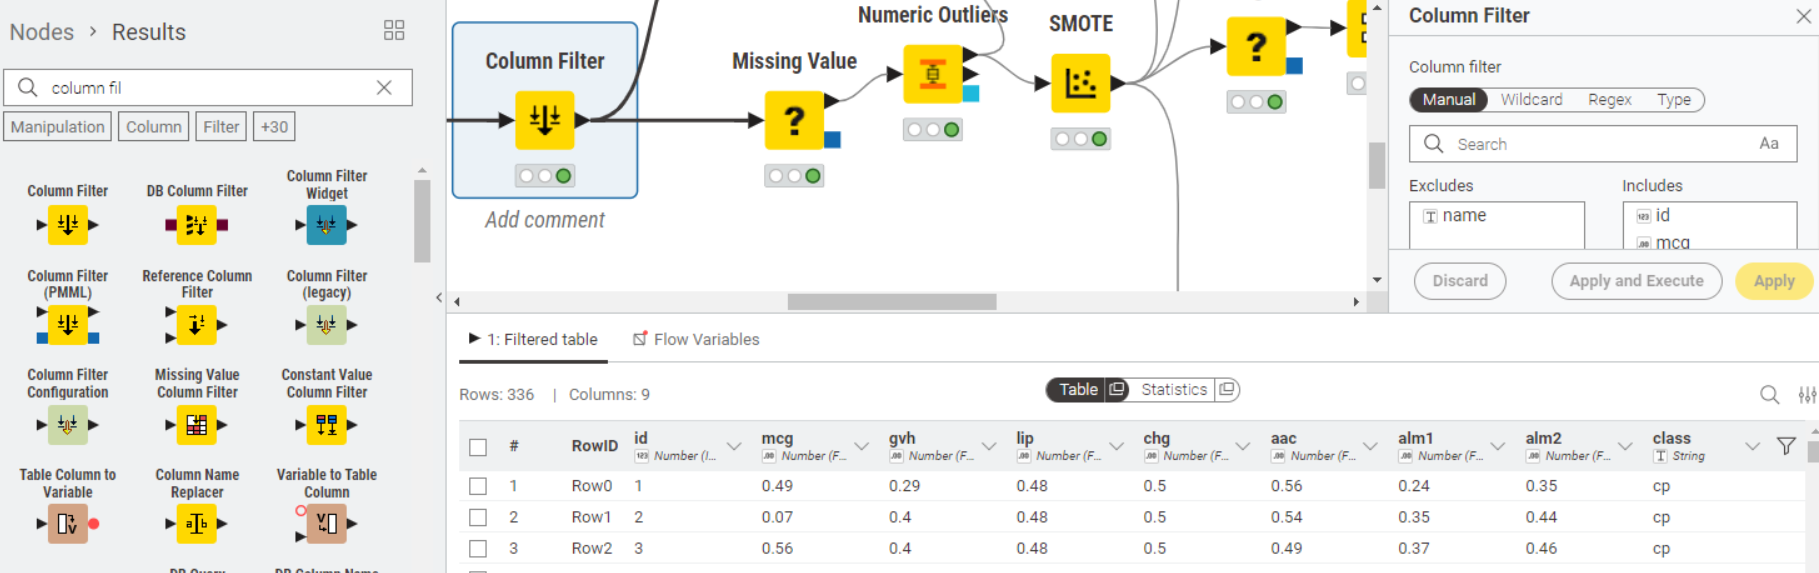



6.   Visualisasi sebelum penyeimbangan data

      Visualisasi ini membantu dalam memahami ketidakseimbangan data (class imbalance) sebelum dilakukan proses seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk penyeimbangan jumlah data antar kelas. Dengan demikian, node Bar Chart ini sangat berguna sebagai langkah eksplorasi awal untuk menganalisis proporsi data per kelas sebelum masuk ke tahap preprocessing atau modeling.

        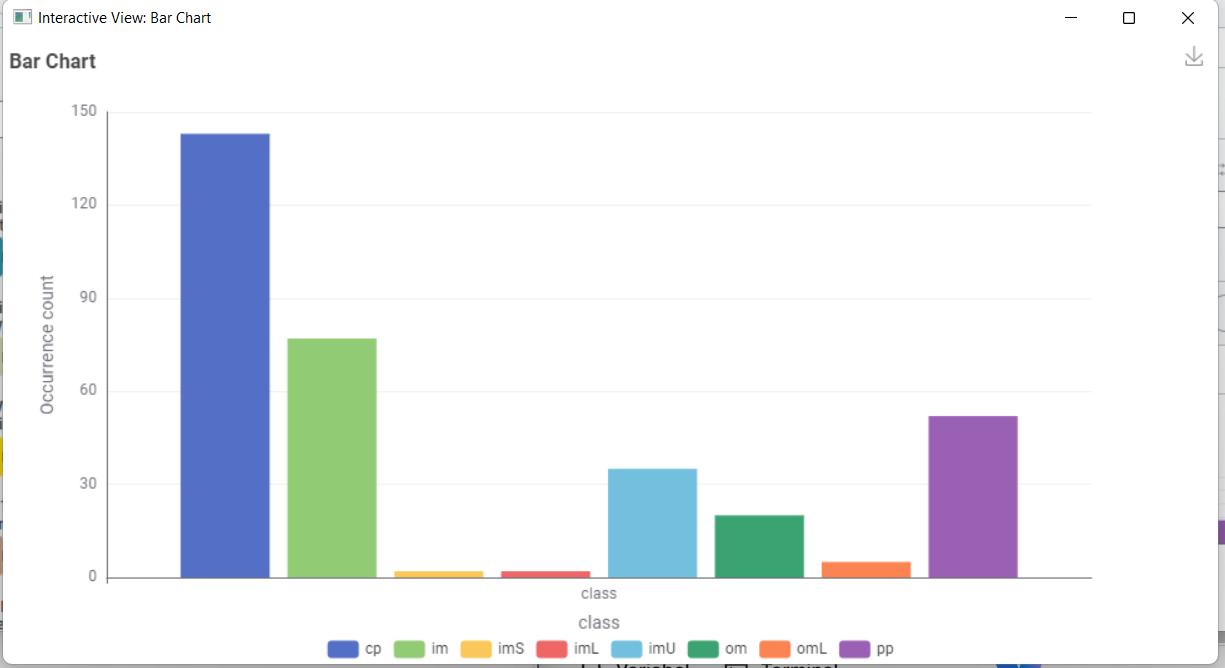

7.   Missing Value

      Langkah ini menggunakan node Missing Value untuk memeriksa adanya data yang hilang pada setiap atribut dalam dataset. Berdasarkan hasil analisis statistik yang ditampilkan, seluruh kolom seperti id, mcg, gvh, lip, chg, aac, dan alm1 menunjukkan jumlah missing value sebesar 0, yang berarti tidak terdapat data yang hilang pada dataset. Selain itu, tabel juga menampilkan informasi seperti nilai minimum, maksimum, kuartil, dan rata-rata yang membantu memahami distribusi setiap variabel. Dengan hasil ini, dapat disimpulkan bahwa dataset dalam kondisi lengkap dan bersih dari nilai yang hilang, sehingga siap digunakan untuk proses analisis berikutnya seperti deteksi outlier maupun penerapan teknik SMOTE.

        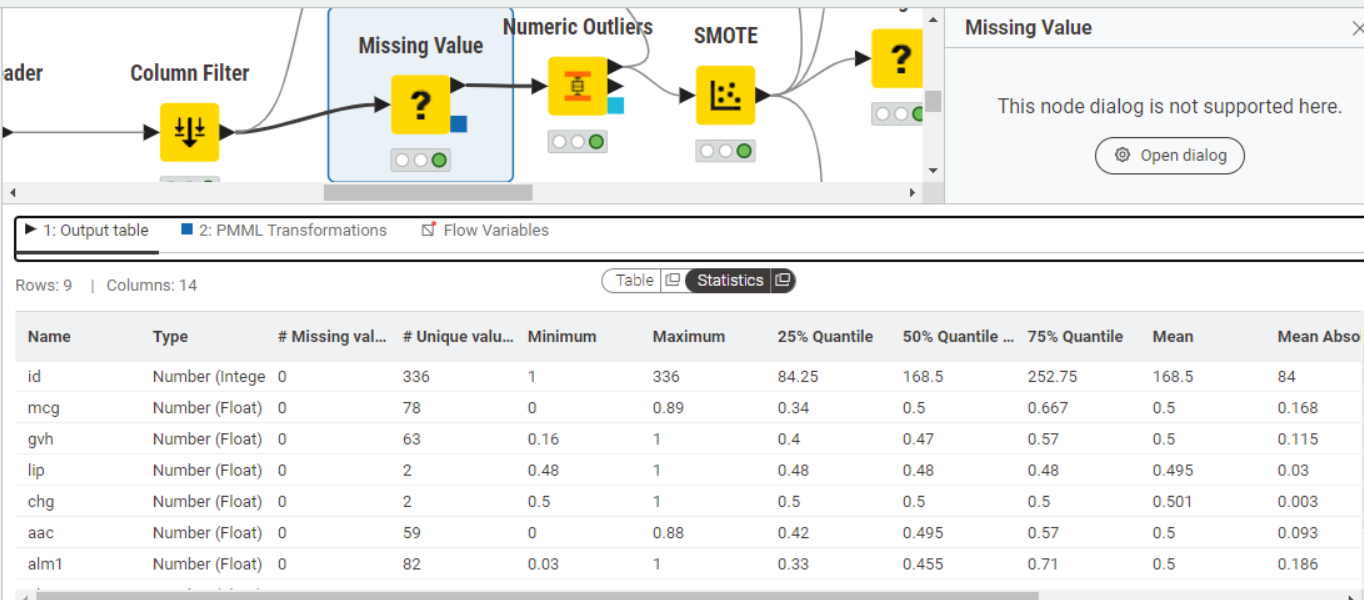

8.   Node Numeric Outliers

      Langkah ini menggunakan node Numeric Outliers untuk mendeteksi nilai-nilai ekstrem atau anomali pada atribut numerik dalam dataset. Berdasarkan hasil output yang ditampilkan pada tabel statistik, terlihat bahwa sebagian besar kolom memiliki distribusi nilai yang normal, namun terdapat beberapa indikasi outlier pada kolom gvh, di mana muncul 13 missing values akibat hasil deteksi dan perlakuan terhadap nilai-nilai yang berada di luar batas normal. Node ini secara otomatis menghitung batas bawah dan atas (menggunakan metode IQR atau Z-score tergantung pengaturan) untuk menentukan nilai mana yang dianggap sebagai outlier. Dengan hasil ini, dataset dapat diidentifikasi bagian mana yang memerlukan perlakuan khusus sebelum dilakukan proses balancing menggunakan SMOTE atau tahap modeling berikutnya.

        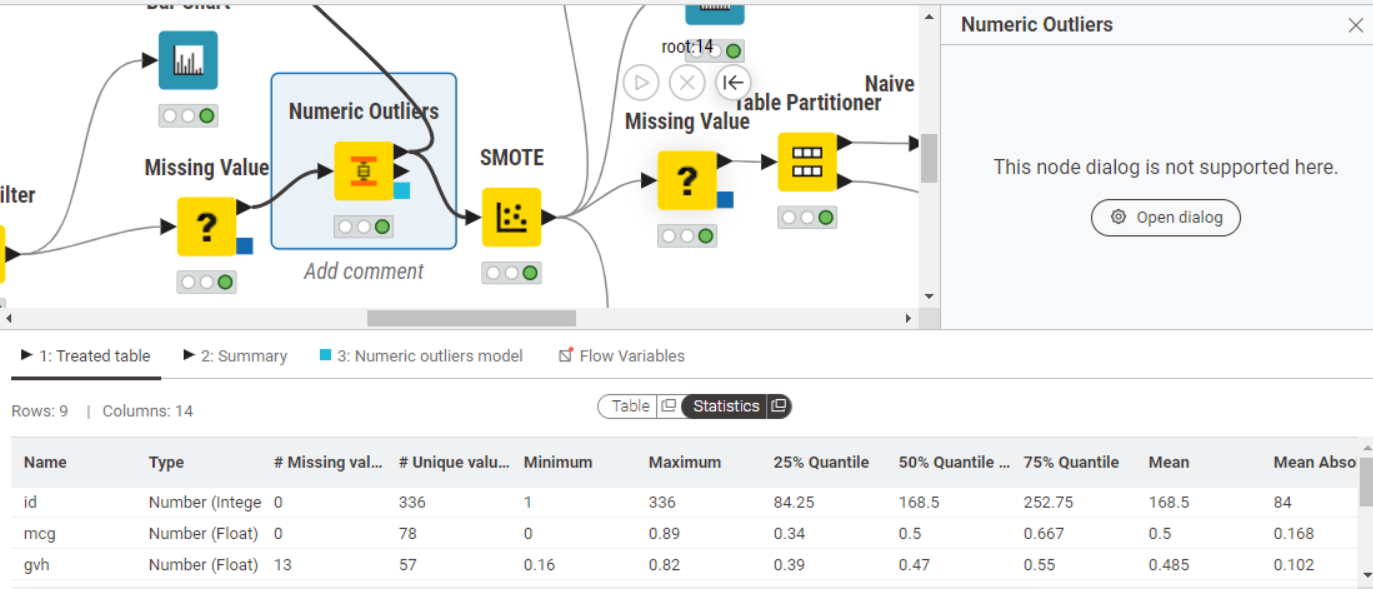

9.  Node Rule Engine

      Langkah ini menggunakan node Rule Engine untuk mengklasifikasikan data menjadi dua kategori, yaitu "Outlier" dan "Normal", berdasarkan hasil deteksi dari node Numeric Outliers sebelumnya. Pada konfigurasi rule engine, digunakan ekspresi:

      `MISSING $mcg$ OR MISSING $gvh$ OR MISSING $lip$ OR MISSING $chg$ OR MISSING $alm1$ OR MISSING $alm2$ OR MISSING $aac$ => "Outlier" TRUE => "Normal"`

      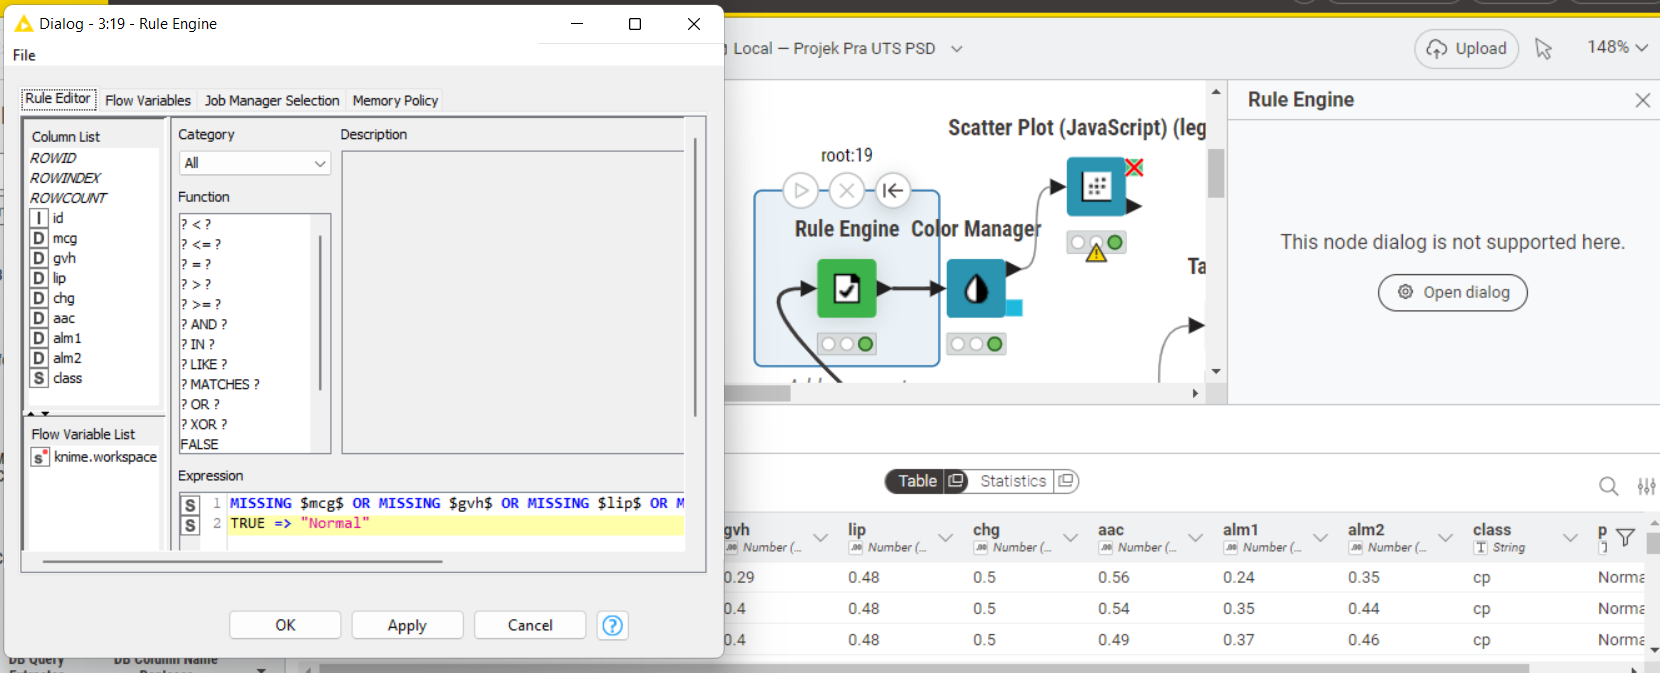

      Aturan tersebut berarti bahwa jika salah satu dari kolom numerik yang disebutkan memiliki nilai missing (kosong) akibat proses deteksi dan perlakuan terhadap outlier sebelumnya, maka baris tersebut akan diberi label "Outlier". Sebaliknya, jika semua nilai valid, maka akan diberi label "Normal".

      Node ini sangat penting karena menghasilkan kolom baru yang menandai status setiap data, sehingga dapat digunakan untuk visualisasi lebih lanjut pada node berikutnya seperti Color Manager dan Scatter Plot untuk melihat persebaran antara data normal dan outlier secara visual.

10.   Node Color Manager

      Node Color Manager digunakan untuk memberikan pewarnaan visual pada data berdasarkan kategori tertentu — dalam hal ini kolom “prediction” yang berisi label Normal dan Outlier. Melalui pengaturan pada node ini, setiap kategori diberi warna berbeda (misalnya hijau untuk Normal dan merah untuk Outlier) sehingga memudahkan dalam membedakan dua kelompok data tersebut pada tahap visualisasi berikutnya, seperti pada Scatter Plot. Dengan demikian, node ini berfungsi untuk memperjelas persebaran data dan pola deteksi outlier secara visual.

      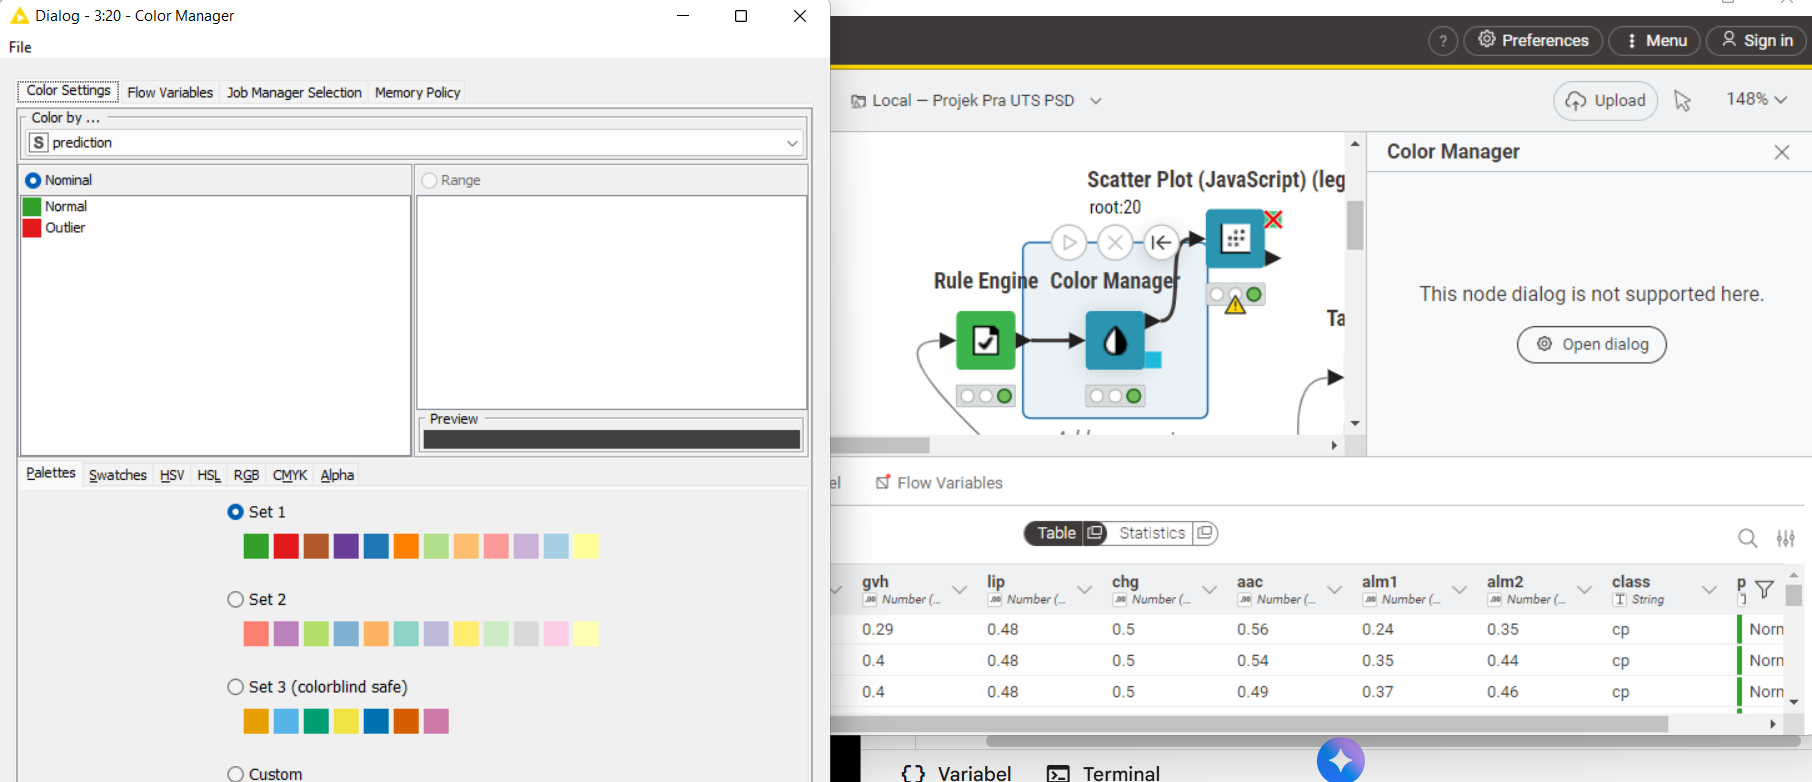

11.  Visual scatter plot

      Visual scatter plot sebelum datanya di seimbangakan

      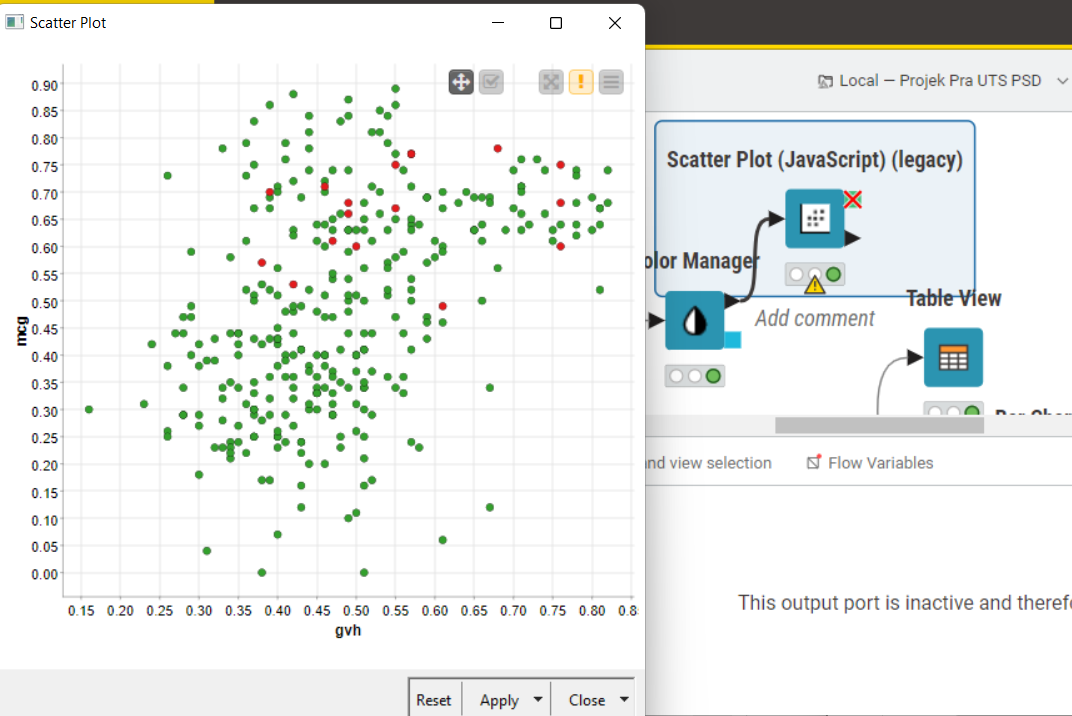



12.   Node SMOTE

      Node SMOTE (Synthetic Minority Oversampling Technique) digunakan untuk menangani ketidakseimbangan kelas (class imbalance) dalam dataset dengan cara menambah contoh sintetis pada kelas minoritas. Dalam konfigurasi yang ditampilkan, kolom class dijadikan acuan untuk menentukan kelas mana yang termasuk minoritas. Parameter # Nearest neighbor = 5 berarti setiap data minoritas akan menghasilkan sampel baru berdasarkan lima tetangga terdekatnya. Opsi Oversample minority classes dipilih agar node ini otomatis menambah data hanya pada kelas yang memiliki jumlah lebih sedikit. Dengan demikian, node ini membantu meningkatkan performa model klasifikasi, seperti Naive Bayes, dengan membuat distribusi data menjadi lebih seimbang antara kelas mayoritas dan minoritas.

        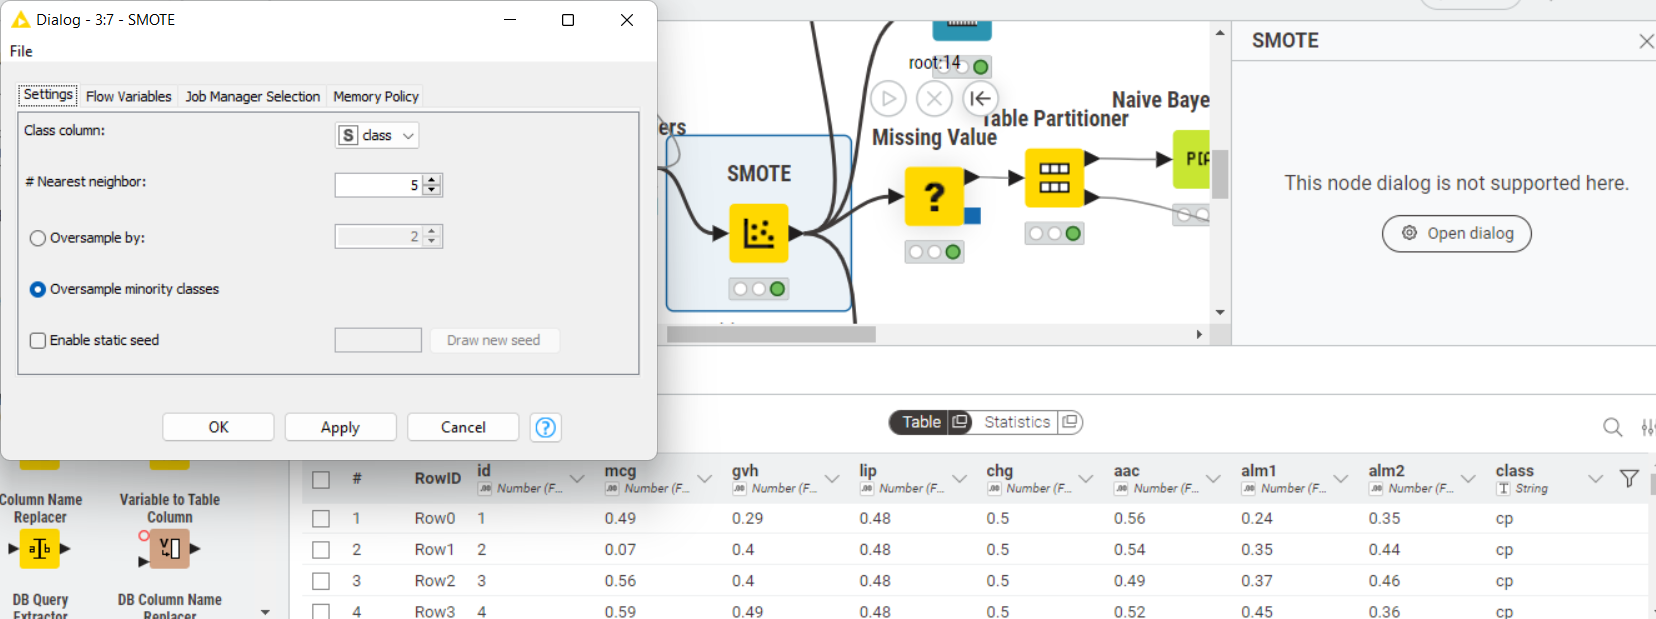

13.  Visual Setelah SMOTE

      Visual pada gambar dibawah ini adalah hasil bar chart dari metode SMOTE untuk menyeimbangkan data.

      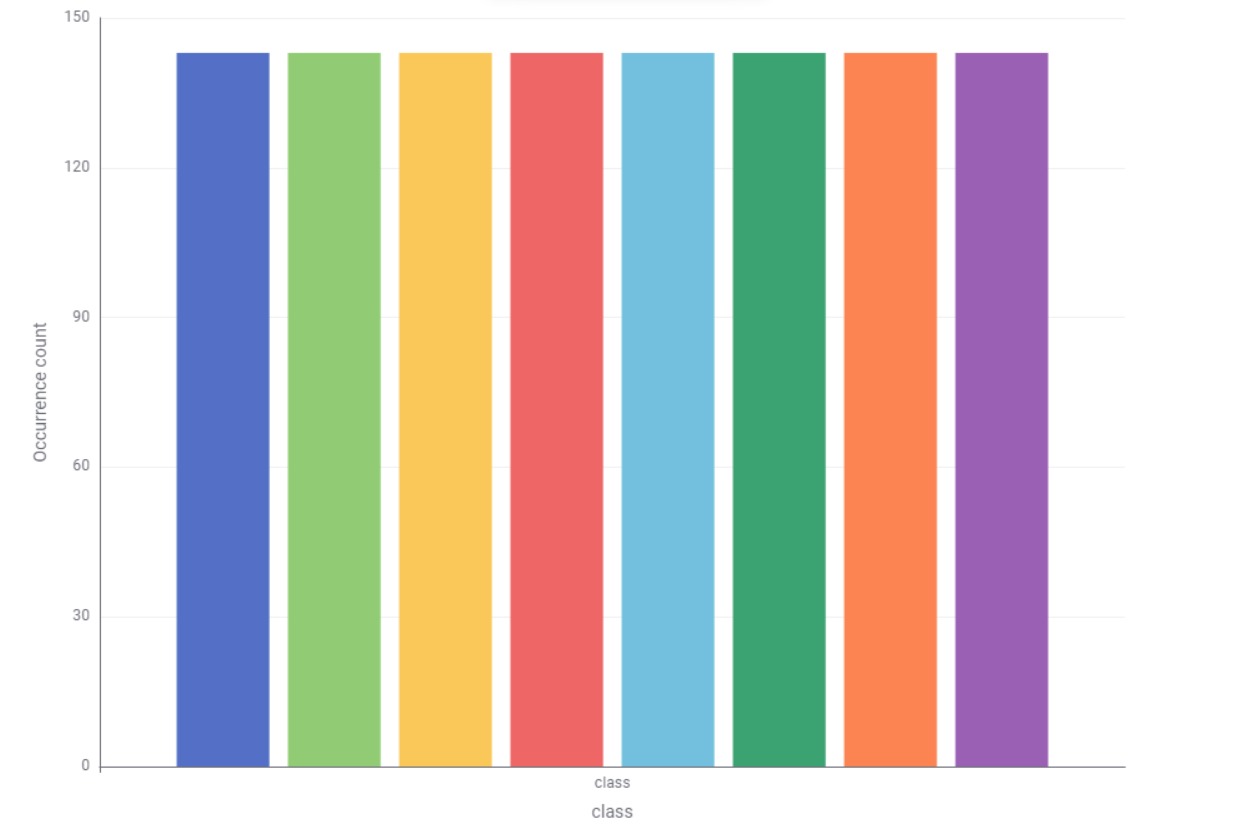



14.   Node Table Partioner

      Node Table Partitioner digunakan untuk membagi dataset menjadi dua bagian, biasanya untuk keperluan pelatihan dan pengujian model.
      
      Pada pengaturan di atas, data dibagi secara acak (Random Sampling) dengan proporsi 70% untuk training dan 30% untuk testing, serta menggunakan opsi Fixed random seed agar pembagian data tetap konsisten setiap kali workflow dijalankan. Node ini membantu memastikan proses evaluasi model menjadi lebih objektif dan dapat direplikasi.

      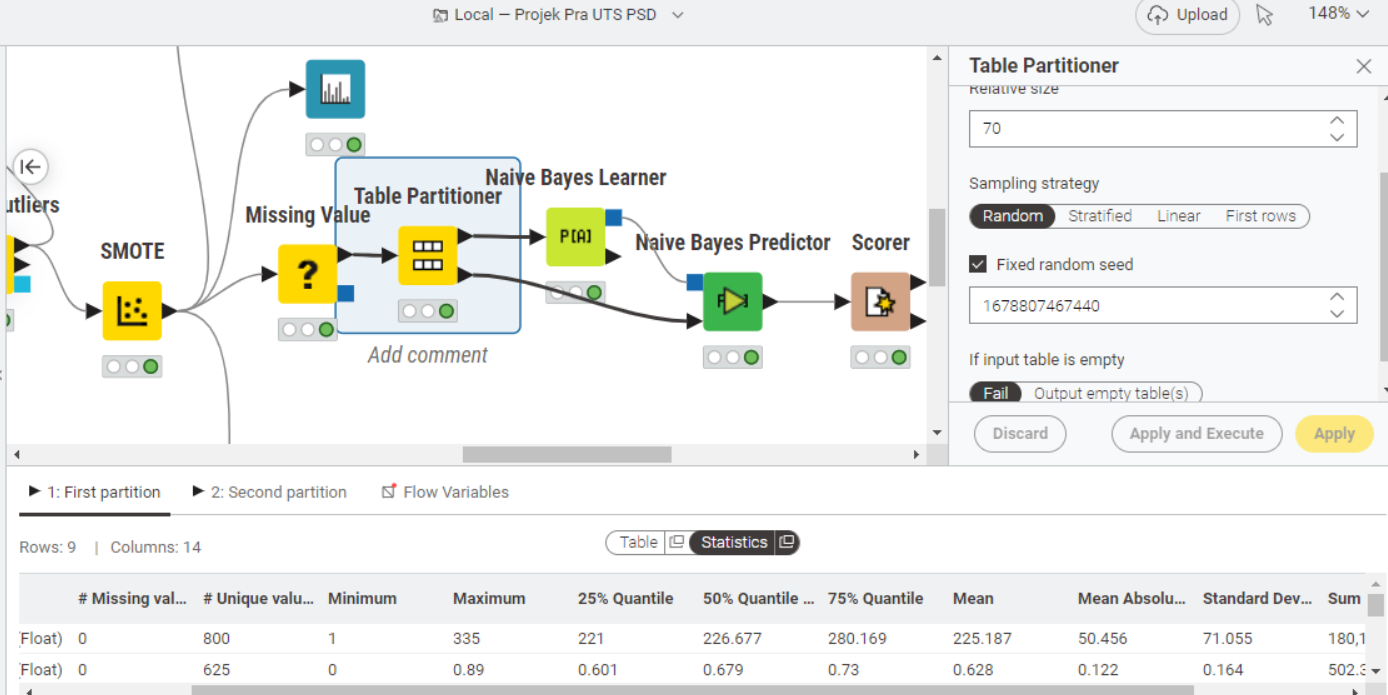

15.   Naive Bayes Learner

      Node Naive Bayes Learner berfungsi untuk membangun model klasifikasi berdasarkan algoritma Naive Bayes.
      
      Pada konfigurasi ini, kolom class dijadikan sebagai target atau label klasifikasi. Nilai Default probability (0.0001) dan Minimum standard deviation (0.0001) digunakan untuk mencegah pembagian dengan nol saat menghitung probabilitas. Model ini nantinya akan menghasilkan representasi probabilistik dari setiap kelas berdasarkan distribusi atribut pada data training.

      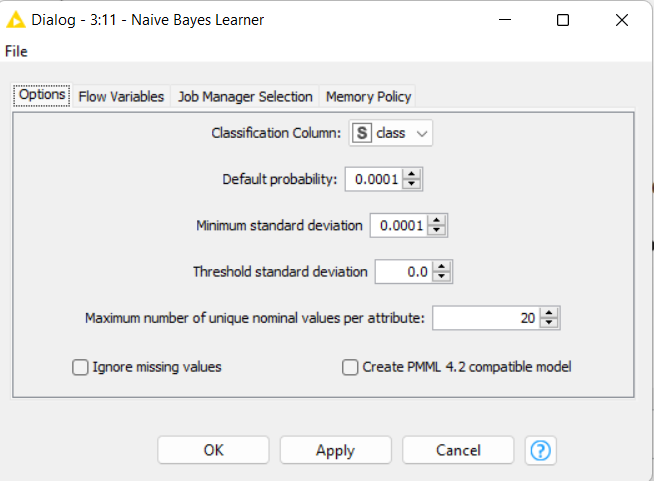
      

16.   Node Naive Bayes Predictor

      Node Naive Bayes Predictor digunakan untuk menerapkan model yang telah dilatih oleh Naive Bayes Learner pada data uji yang diperoleh dari Table Partitioner.
      
      Node ini menghasilkan kolom baru berisi prediksi kelas serta probabilitas dari setiap kemungkinan kelas. Dengan cara ini, pengguna dapat membandingkan hasil prediksi model terhadap nilai aktual dari kolom class untuk menilai performa model.

      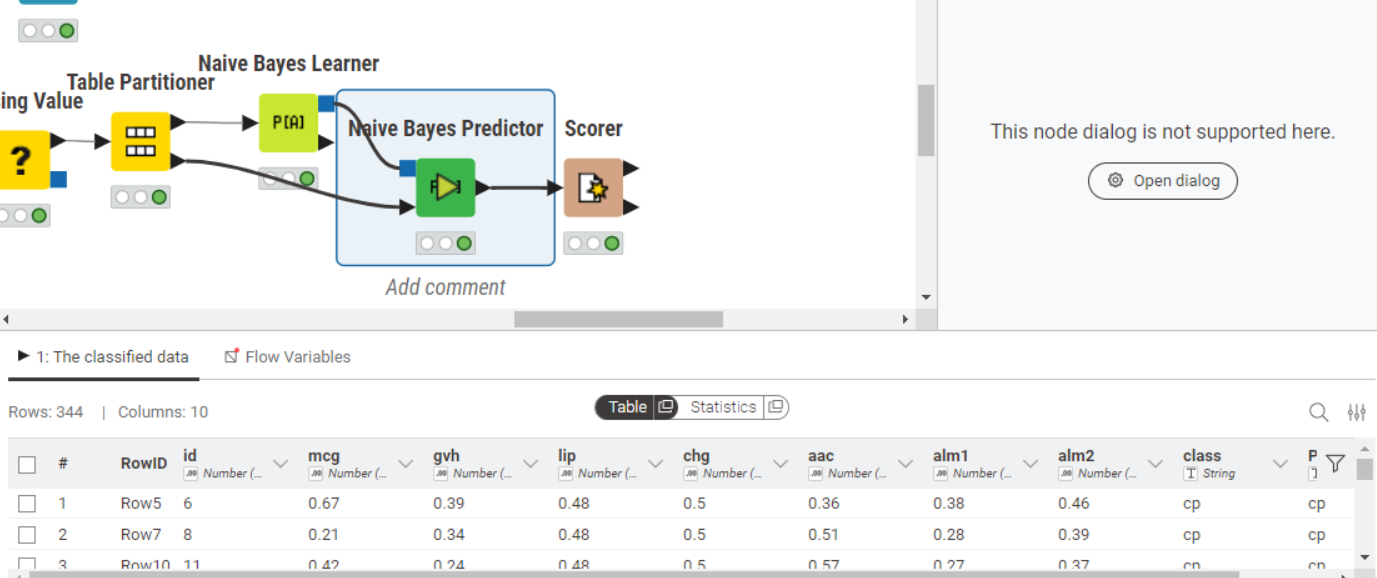

17.   Scorer

      Node Scorer berfungsi untuk mengevaluasi performa model klasifikasi dengan membandingkan nilai aktual (kolom class) dan hasil prediksi (kolom Prediction (class)). Node ini menghasilkan confusion matrix, akurasi, precision, recall, dan F-measure, sehingga pengguna dapat mengetahui seberapa baik model dalam melakukan klasifikasi. Pada pengaturan yang digunakan, opsi Ignore missing values dipilih untuk memastikan nilai kosong tidak mempengaruhi hasil evaluasi.

      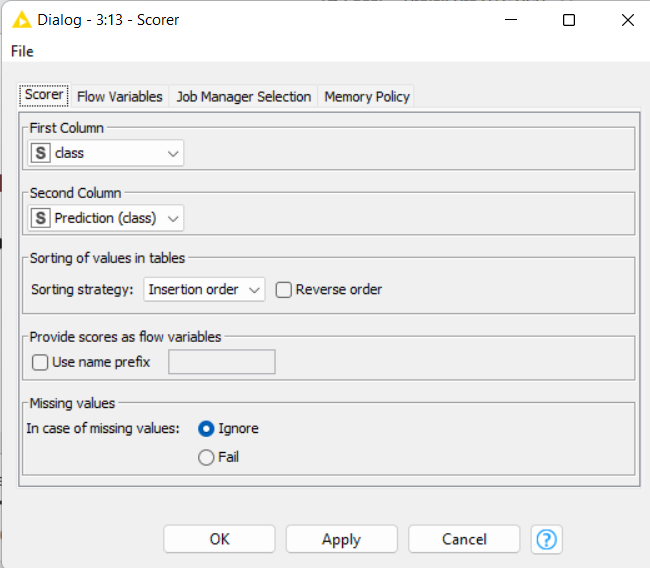

18.   Node Python Script Legacy

      Node Python Script (Legacy) yang diletakkan setelah node SMOTE berfungsi untuk melakukan proses pelatihan, pengujian, dan evaluasi model klasifikasi menggunakan algoritma Random Forest terhadap data yang telah diseimbangkan. Node ini menerima masukan berupa dataset hasil oversampling dari node SMOTE, kemudian menjalankan beberapa tahapan utama, yaitu pemisahan data, pelatihan model, prediksi, dan evaluasi performa.

      Pertama, node ini menyalin data masukan dari KNIME dan memastikan bahwa kolom target bernama class tersedia dalam dataset. Jika terdapat kolom ID, kolom tersebut disimpan sementara agar tidak memengaruhi proses pelatihan, kemudian dihapus dari data utama. Selanjutnya, data dipisahkan menjadi dua bagian: fitur (X) yang berisi atribut prediktor dan target (y) yang berisi label kelas yang akan diprediksi.

      Data kemudian dibagi menjadi 70% untuk pelatihan (training set) dan 30% untuk pengujian (testing set) dengan teknik stratifikasi agar proporsi setiap kelas tetap seimbang. Setelah itu, model Random Forest Classifier dibangun dengan 100 pohon keputusan dan parameter acak yang dikontrol menggunakan random_state=42 agar hasil tetap konsisten. Model ini kemudian dilatih menggunakan data training, dan hasilnya digunakan untuk memprediksi label pada data testing.

      Hasil prediksi dibandingkan dengan label aktual untuk menghitung berbagai metrik evaluasi, seperti akurasi, precision, recall, dan F1-score, yang disajikan dalam bentuk tabel laporan klasifikasi. Selain itu, node ini juga membentuk confusion matrix yang menunjukkan perbandingan antara kelas aktual dan prediksi, sehingga dapat diketahui pola kesalahan klasifikasi yang terjadi.

      Sebagai pelengkap, node ini juga menghasilkan tabel berisi hasil prediksi per record, termasuk label aktual, label prediksi, status kebenaran prediksi (benar atau salah), dan nilai akurasi total dalam persen. Jika kolom ID tersedia, kolom tersebut akan digabungkan kembali ke hasil akhir untuk memudahkan pelacakan setiap record.

      Akhirnya, node ini menghasilkan tiga output:

      - Output 1 berupa tabel hasil prediksi setiap data uji,

      - Output 2 berupa laporan klasifikasi model dalam bentuk DataFrame, dan

      - Output 3 berupa confusion matrix hasil evaluasi model.

      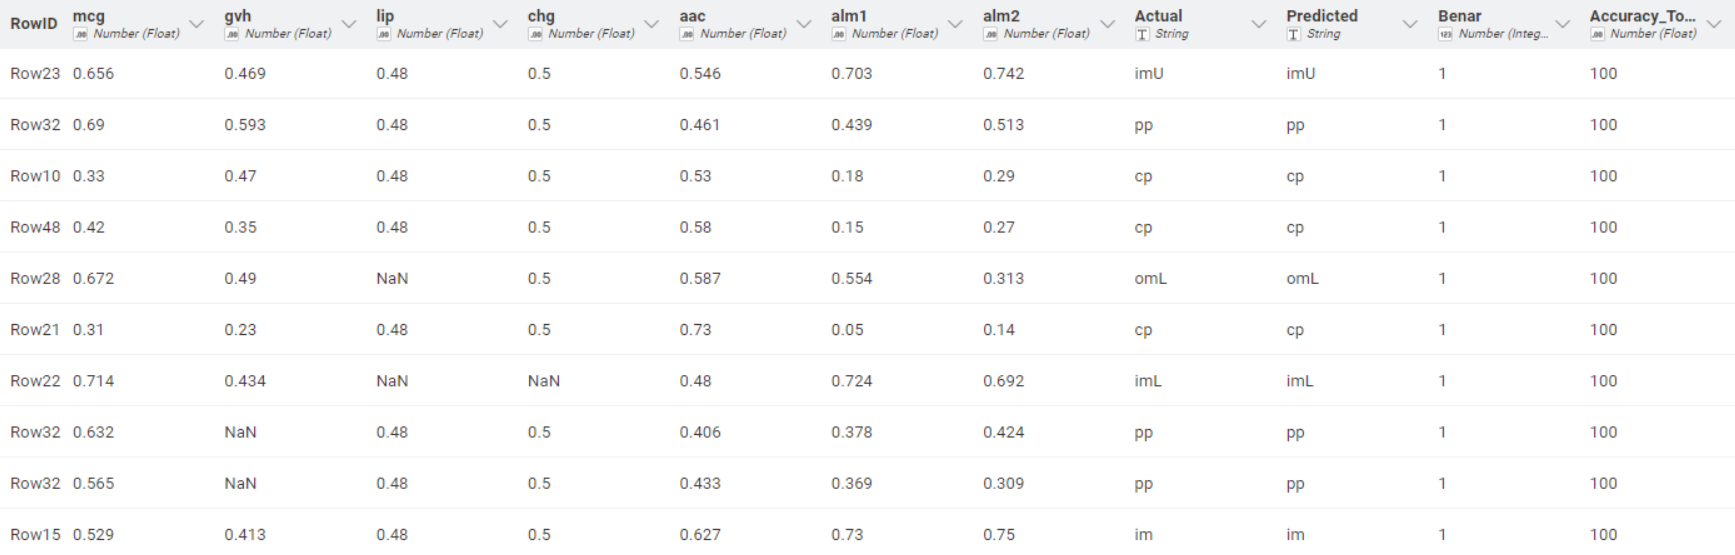

      Secara keseluruhan, node ini berperan penting dalam workflow KNIME sebagai tahap evaluasi performa model setelah data diseimbangkan oleh SMOTE, sehingga dapat diketahui seberapa baik model Random Forest dalam mengklasifikasikan data dengan distribusi kelas yang telah diperbaiki.